# **Marketing Campaign**
### Boost the profit of a marketing campaign


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **About Dataset**
## **Context**
### A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service
## **Column Definition**
### AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
### AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
### AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
### AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
### AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
### Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
### Complain - 1 if customer complained in the last 2 years
### DtCustomer - date of customer’s enrolment with the company
### Education - customer’s level of education
### Marital - customer’s marital status
### Kidhome - number of small children in customer’s household
### Teenhome - number of teenagers in customer’s household
### Income - customer’s yearly household income
### MntFishProducts - amount spent on fish products in the last 2 years
### MntMeatProducts - amount spent on meat products in the last 2 years
### MntFruits - amount spent on fruits products in the last 2 years
### MntSweetProducts - amount spent on sweet products in the last 2 years
### MntWines - amount spent on wine products in the last 2 years
### MntGoldProds - amount spent on gold products in the last 2 years
### NumDealsPurchases - number of purchases made with discount
### NumCatalogPurchases - number of purchases made using catalogue
### NumStorePurchases - number of purchases made directly in stores
### NumWebPurchases - number of purchases made through company’s web site
### NumWebVisitsMonth - number of visits to company’s web site in the last month
### Recency - number of days since the last purchase

# **User Defined Functions**

In [2]:
def numeric_skew(x):
  if x.skew()<=-0.5:
    return(f"Left Skew")
  elif -0.5<=x.skew()<=0.5:
    return(f"Symmetric")
  else:
    return(f"Right Skew")

# **Importing libraries**

In [3]:
# !pip install pandas-profiling

In [4]:
!pip install scikit-plot

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns=None
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[8,6]
plt.rcParams['figure.dpi']=100
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, auc, roc_curve, ConfusionMatrixDisplay, recall_score, precision_score, accuracy_score, f1_score, cohen_kappa_score, roc_auc_score, log_loss
from scikitplot.metrics import plot_precision_recall, plot_cumulative_gain
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier


# **Importing of DataSet**

In [6]:
data = pd.read_csv("/content/drive/MyDrive/IIT-Roorkee Project/Raw_Data/marketing_campaign.csv",sep=';')
df = data.copy(deep=True)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# **Information on DataSet**
### We need to change the Data Type of few variables
### 1. ID : It should be Object as it is not needed for numeric operations
### 2. Income : There are few missing values and we need to impute it
### 3. Dt_Customer : It should be made DateTime


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
pd.DataFrame(df.isnull().sum()/len(df)*100,columns=['%_Null_Values'])

,%_Null_Values
ID,0.000000
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Income,1.071429
Kidhome,0.000000
Teenhome,0.000000
Dt_Customer,0.000000
Recency,0.000000
MntWines,0.000000


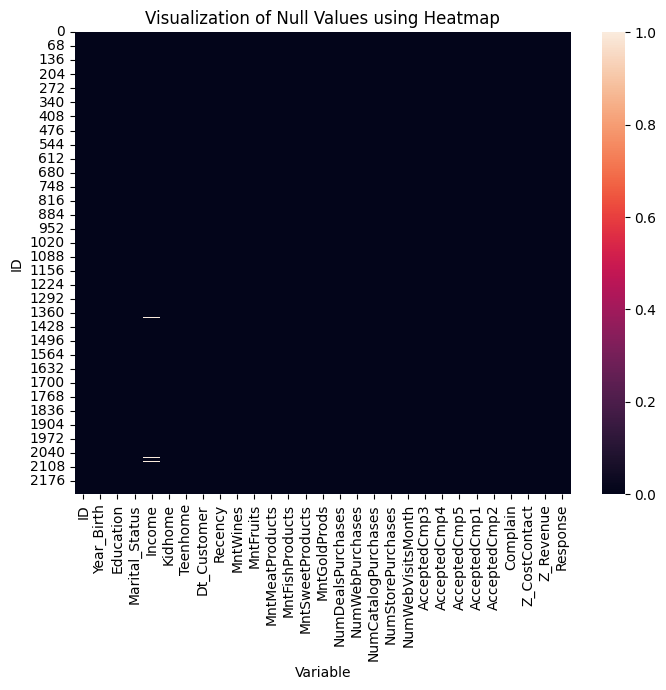

In [9]:
sns.heatmap(df.isnull())
plt.ylabel("ID")
plt.xlabel("Variable")
plt.title("Visualization of Null Values using Heatmap")
#plt.savefig(f"/content/drive/MyDrive/IIT-Roorkee Project/Visualization_Null_Values_Heatmap.jpg",format='jpg')
plt.show()

In [10]:
df['ID'] = df['ID'].apply(lambda x:str(x))
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format="%Y-%m-%d")

# **Describing the DataFrame**

In [11]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [12]:
df.describe(include='object')

,ID,Education,Marital_Status
count,2240,2240,2240
unique,2240,5,8
top,5524,Graduation,Married
freq,1,1127,864


# **Exploratory Data Analysis**

In [13]:
df['Dt_Customer_day'] = df['Dt_Customer'].dt.day
df['Dt_Customer_month'] = df['Dt_Customer'].dt.month
df['Dt_Customer_year'] = df['Dt_Customer'].dt.year
df['Dt_Customer_Day_of_Week'] = df['Dt_Customer'].dt.day_name()
df['Dt_Customer_Current_Age'] = df[['Dt_Customer_year','Year_Birth']].apply(lambda x: x['Dt_Customer_year'] - x['Year_Birth'], axis=1)
df.set_index('ID', drop=True, inplace=True, verify_integrity=False)
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_day,Dt_Customer_month,Dt_Customer_year,Dt_Customer_Day_of_Week,Dt_Customer_Current_Age
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,4,9,2012,Tuesday,55
2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,8,3,2014,Saturday,60
4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,21,8,2013,Wednesday,48
6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,10,2,2014,Monday,30
5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,19,1,2014,Sunday,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,13,6,2013,Thursday,46
4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,10,6,2014,Tuesday,68
7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,25,1,2014,Saturday,33


## **Univariate Data Analysis**

### **Numeric Variable**

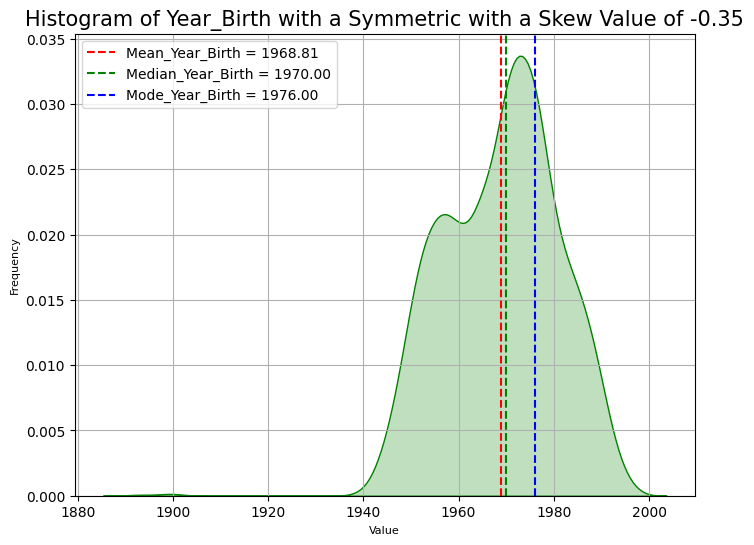

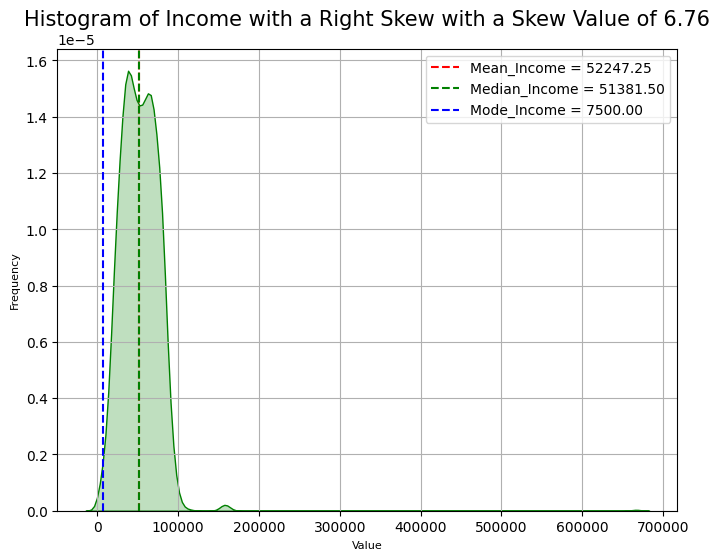

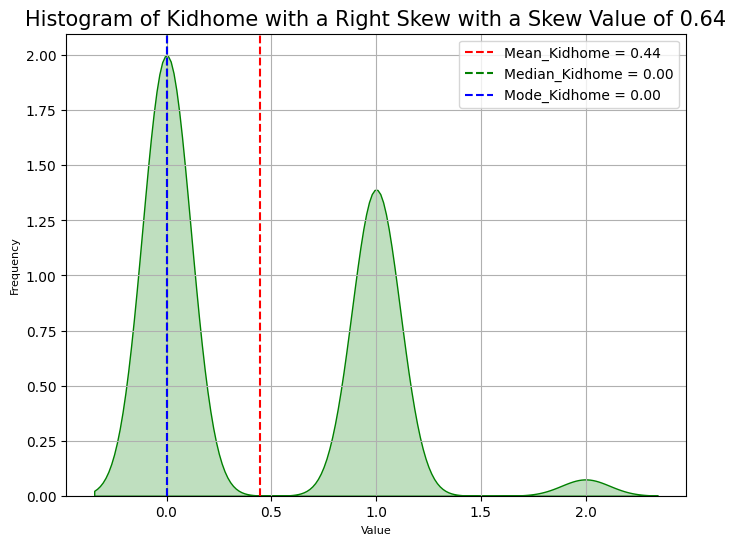

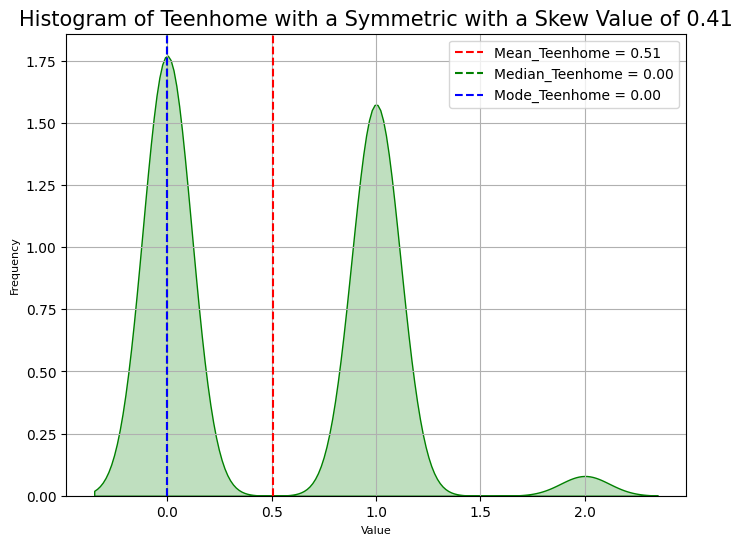

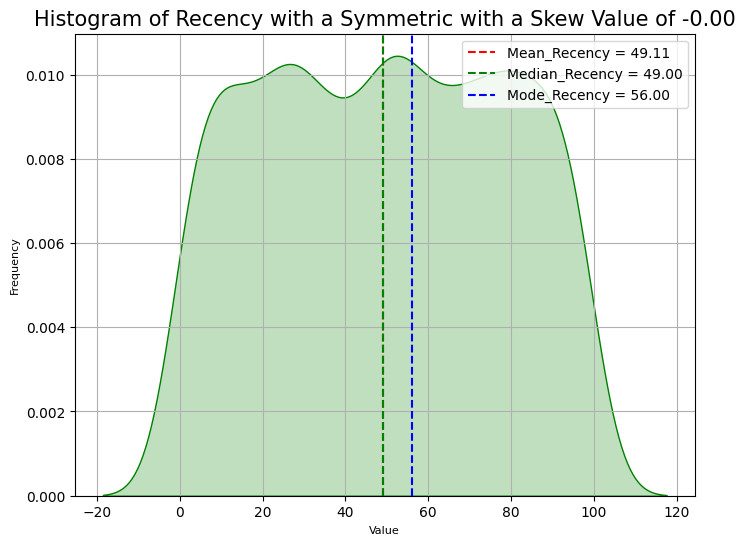

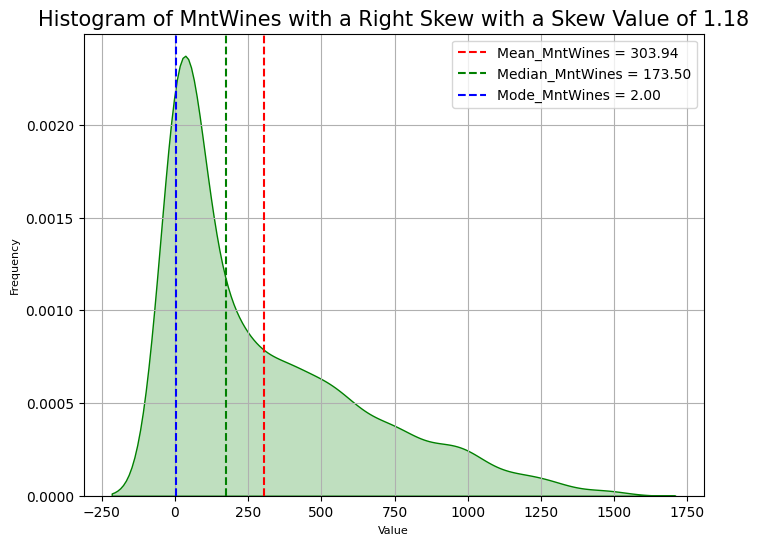

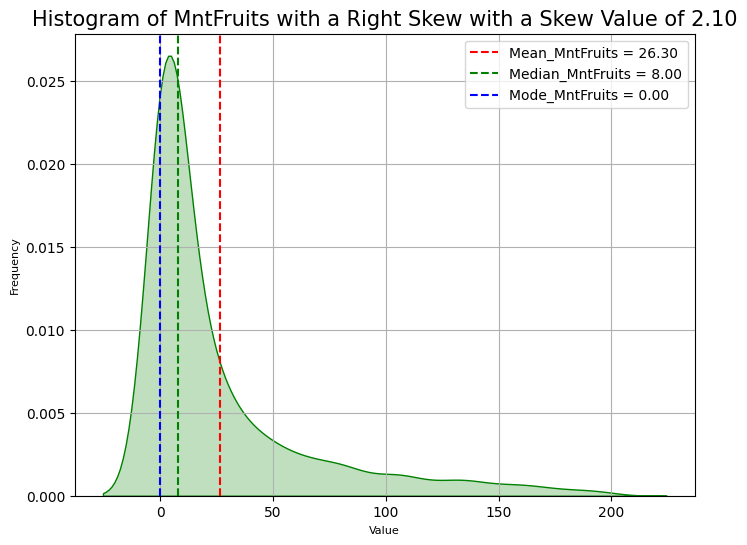

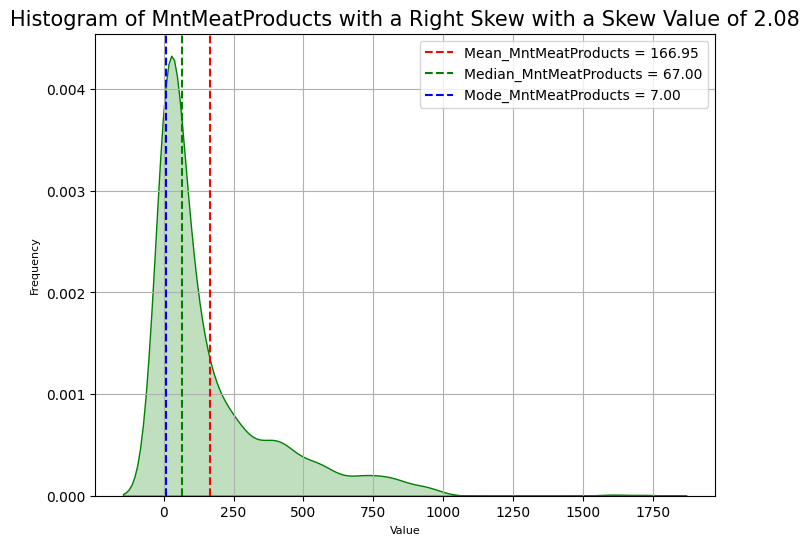

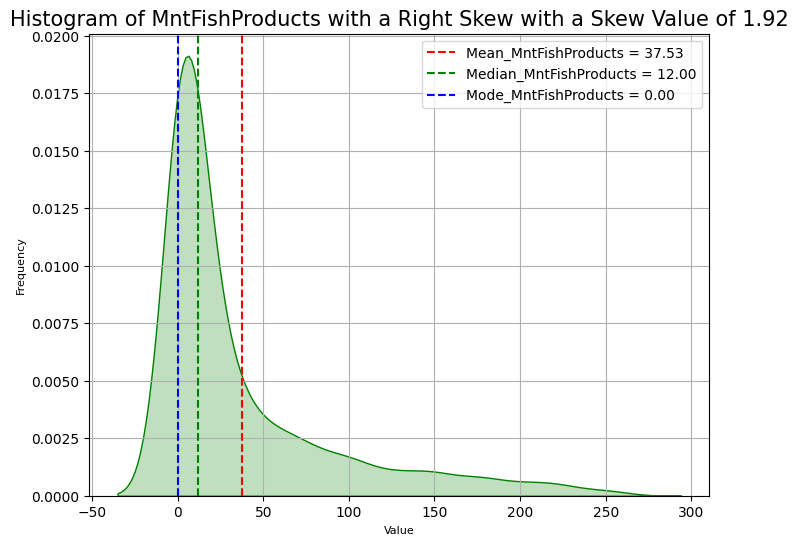

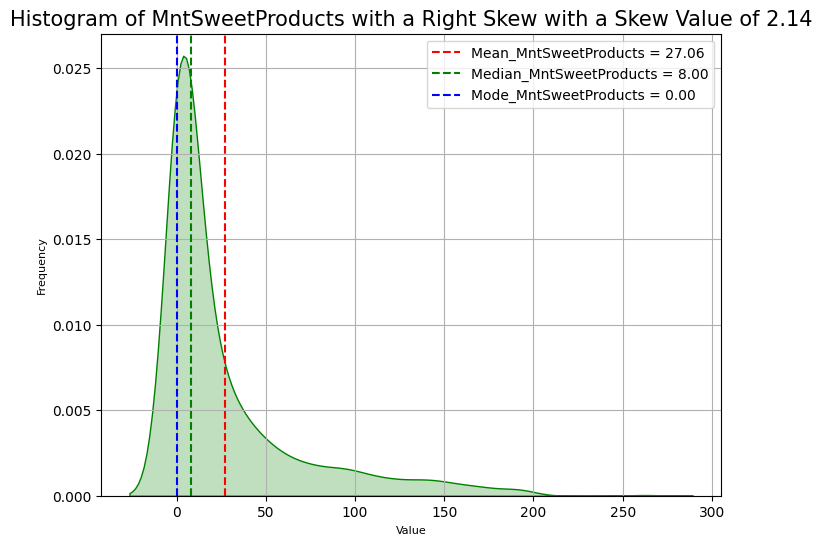

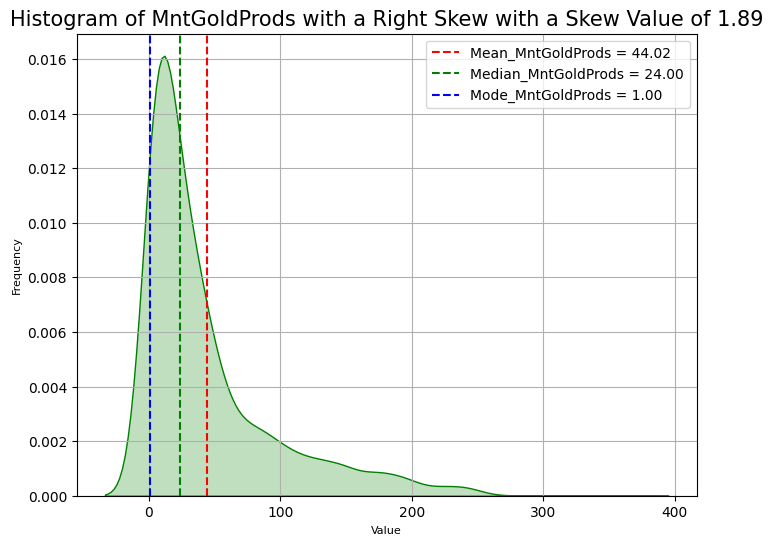

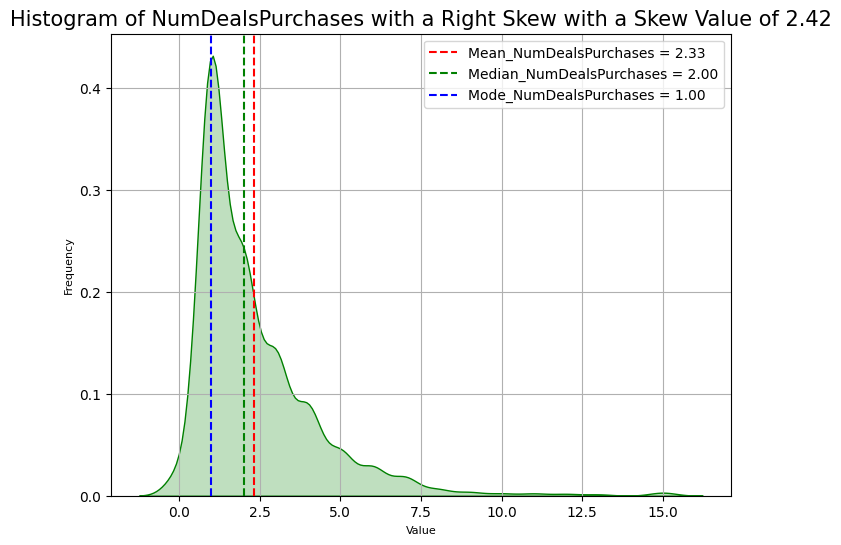

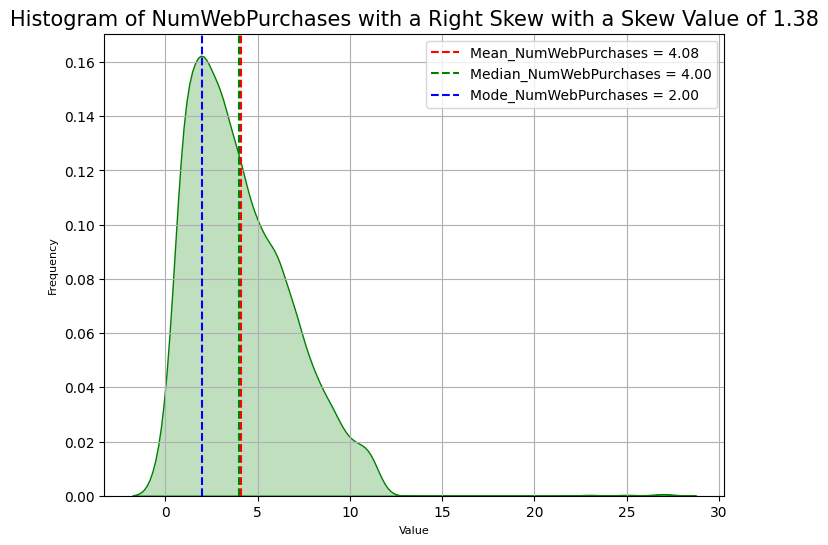

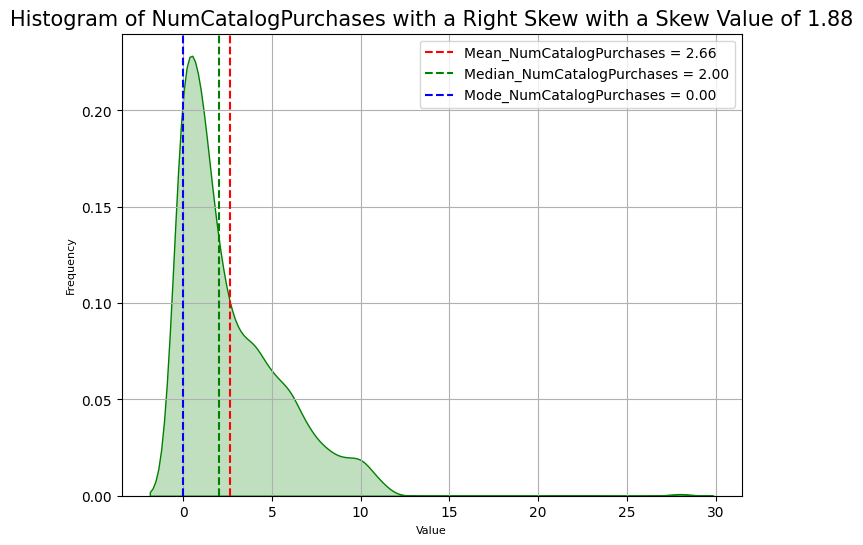

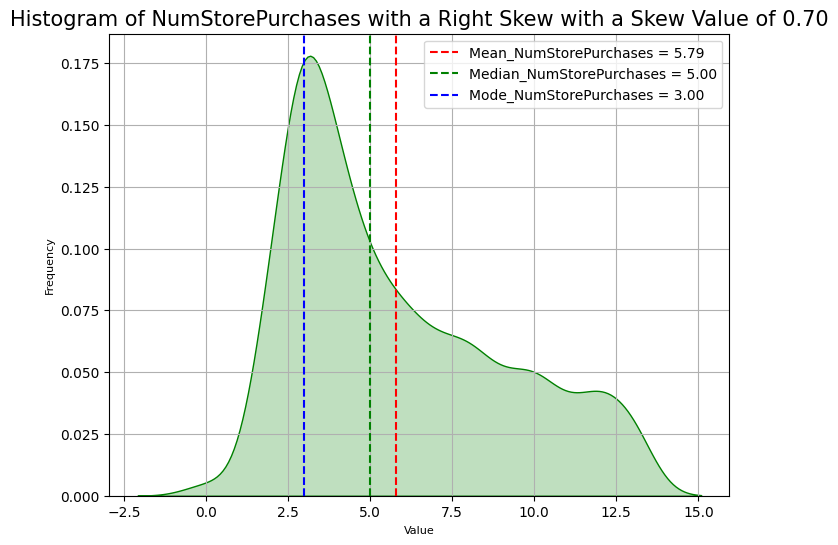

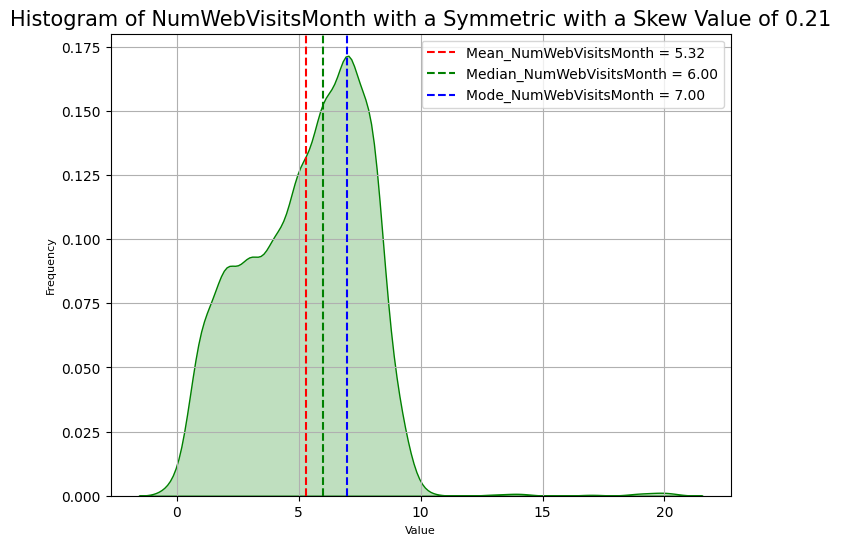

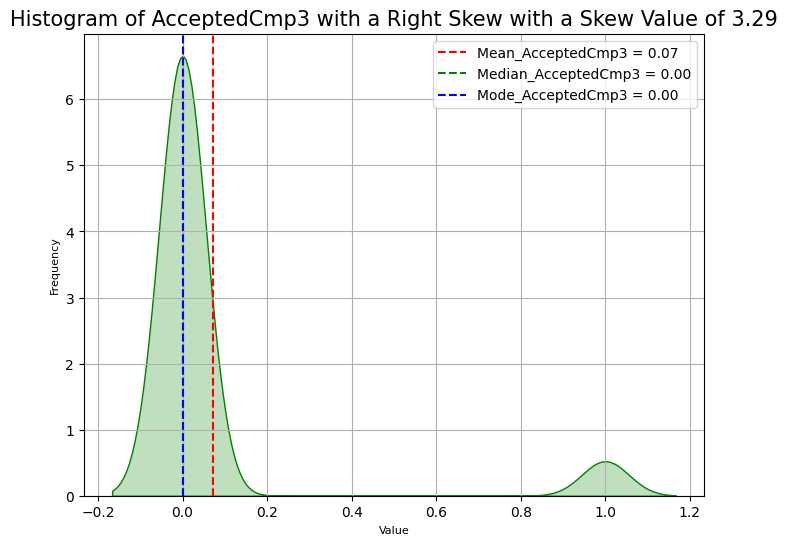

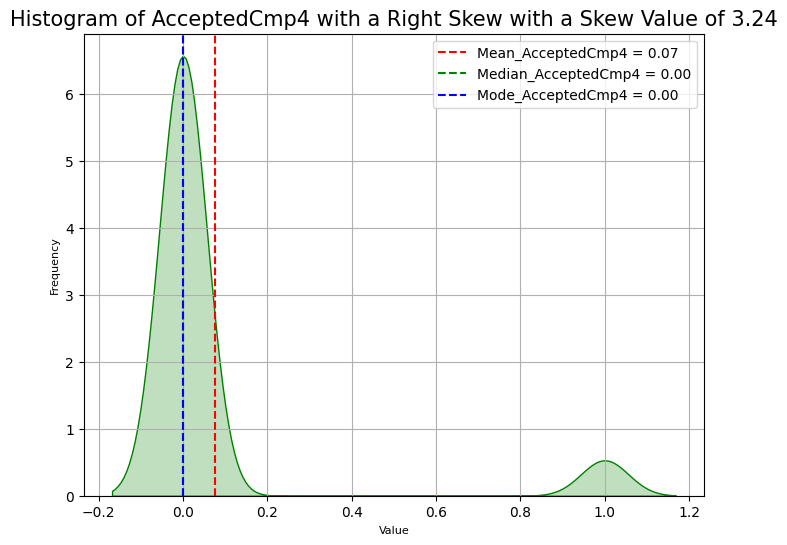

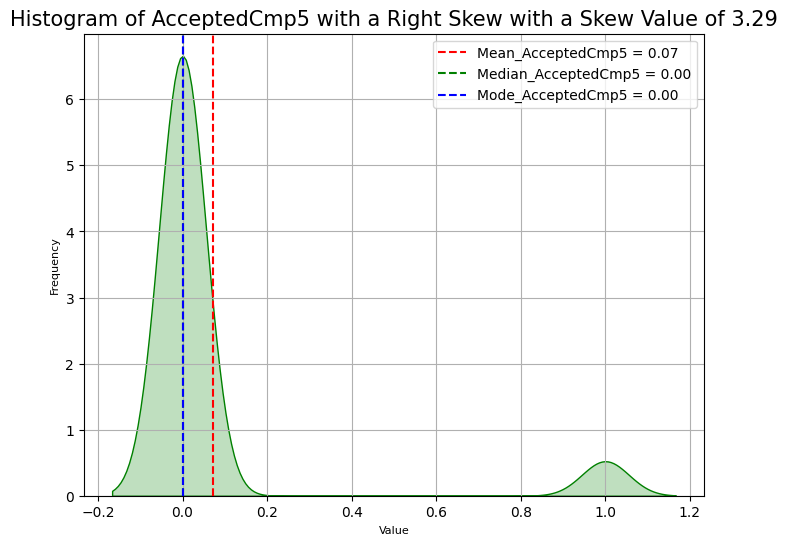

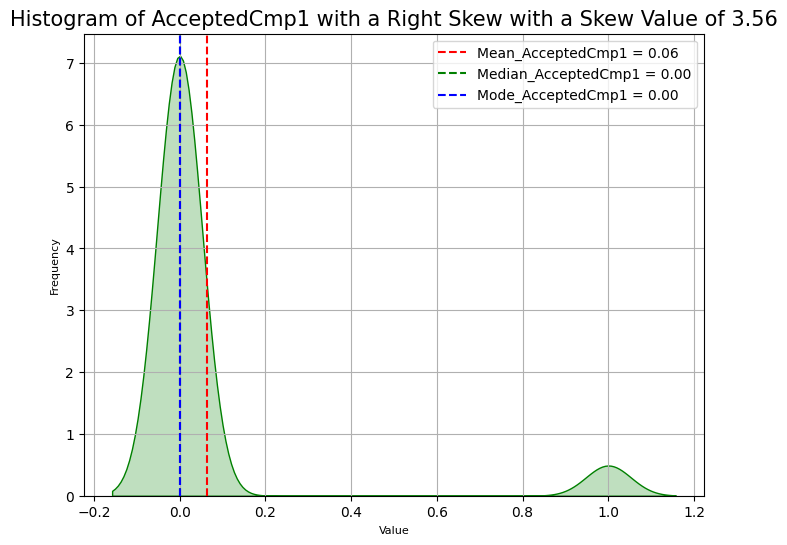

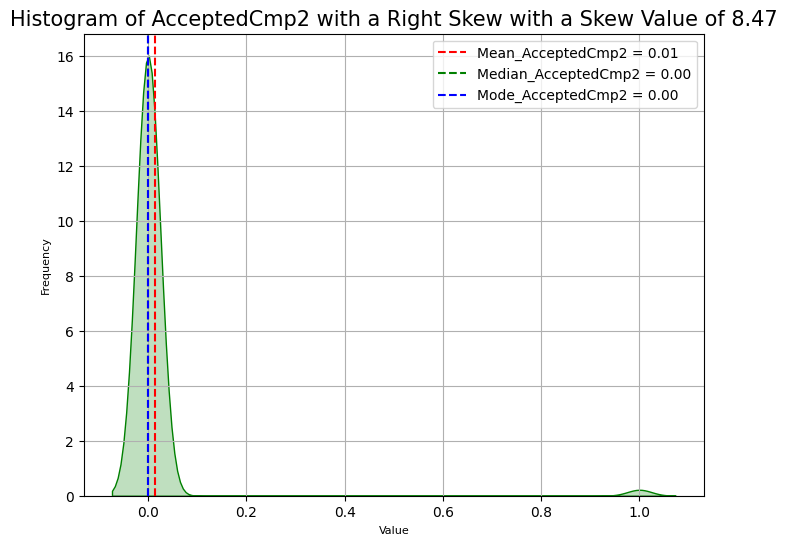

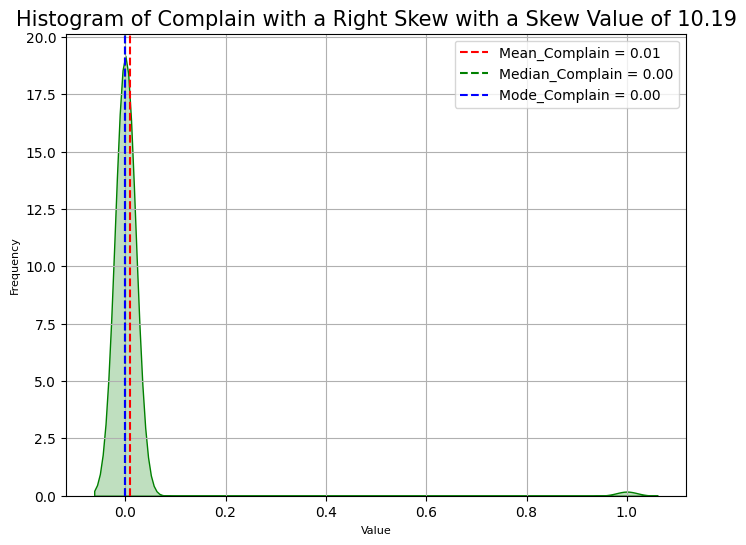

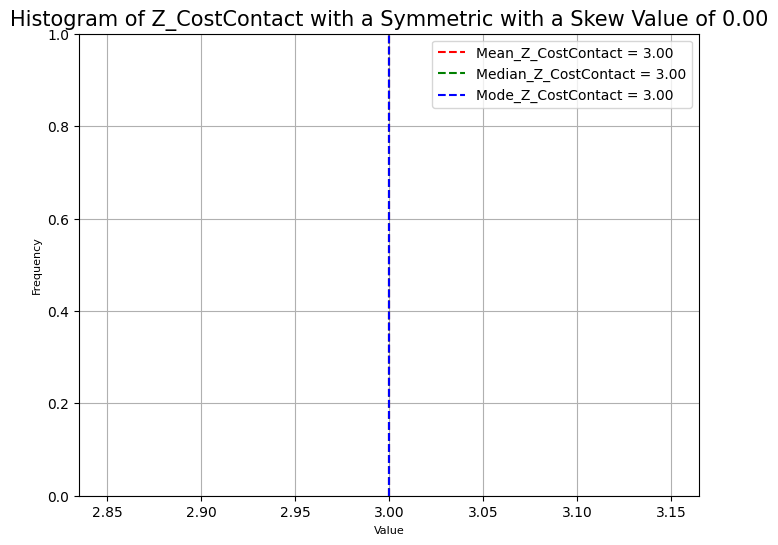

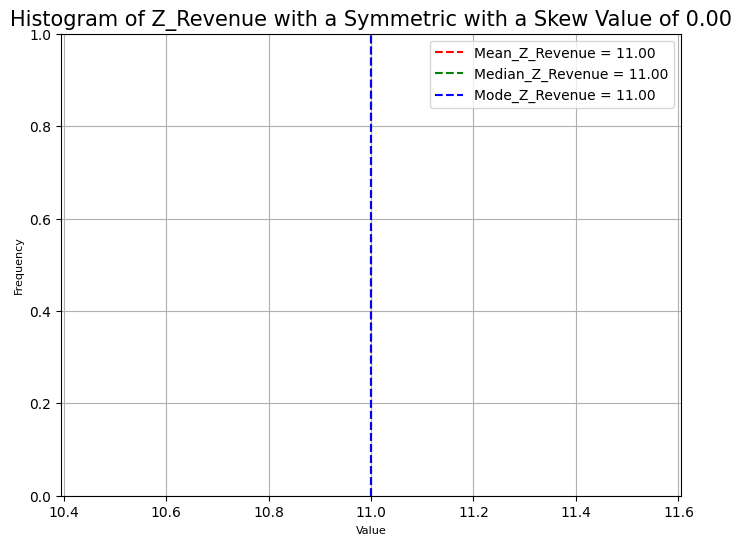

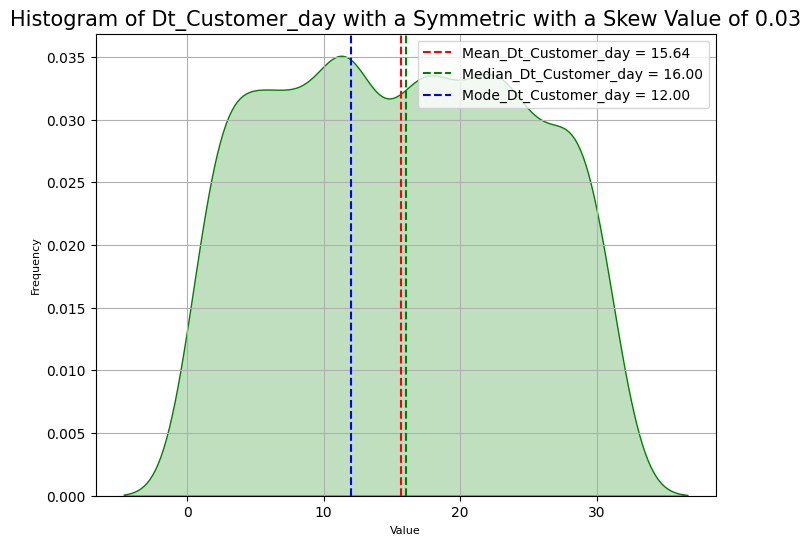

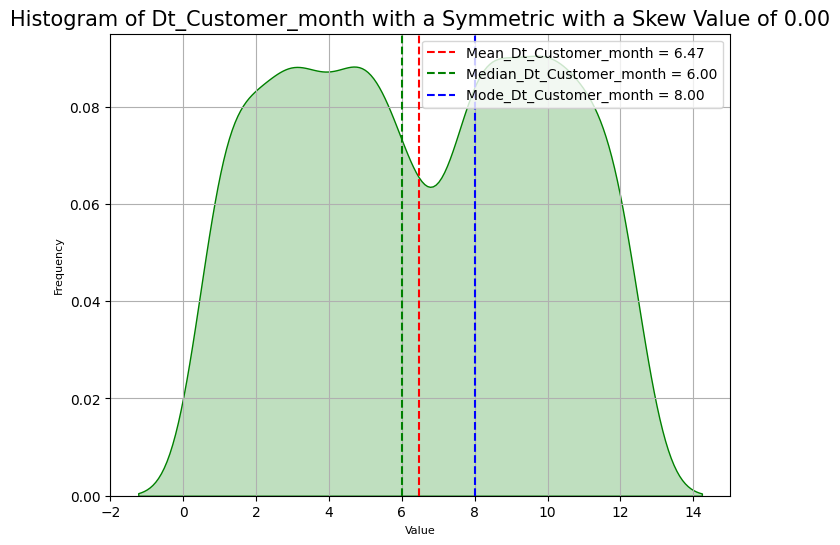

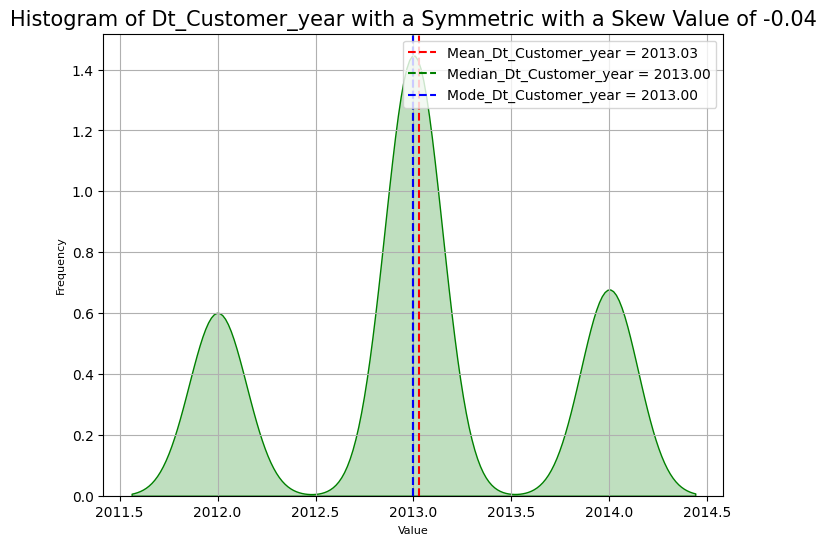

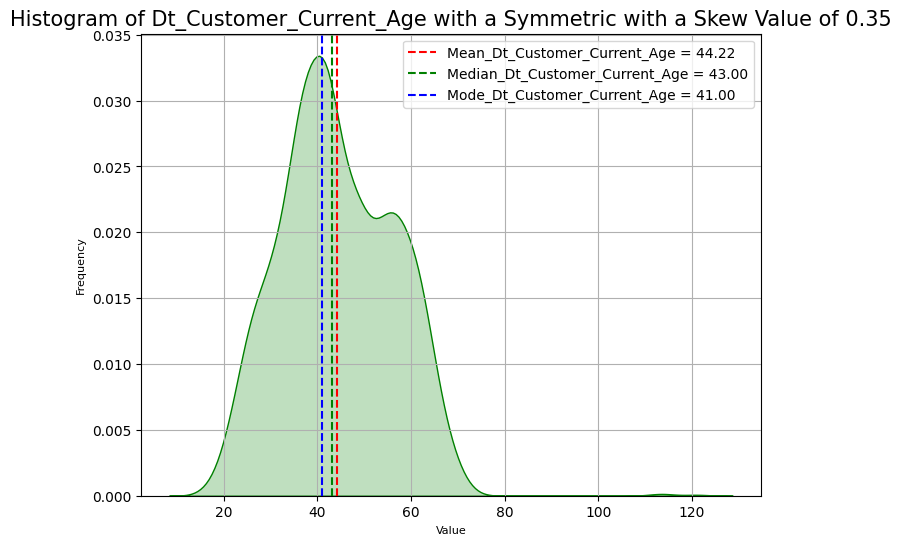

In [14]:
for i in [x for x in (list(df.select_dtypes(exclude='object').columns)) if x not in ['Response','Dt_Customer']]:
  sns.kdeplot(df[i], shade=True, color='green')
  plt.axvline(x=df[i].mean(), color='r', linestyle='--',label=f"Mean_{i} = {df[i].mean():0.2f}")
  plt.axvline(x=df[i].median(), color='g', linestyle='--',label=f"Median_{i} = {df[i].median():0.2f}")
  plt.axvline(x=df[i].mode()[0], color='b', linestyle='--',label=f"Mode_{i} = {df[i].mode()[0]:0.2f}")
  plt.xlabel(xlabel = 'Value',fontsize = 8)
  plt.ylabel(ylabel = 'Frequency',fontsize = 8)
  plt.title(label = f'Histogram of {i} with a {numeric_skew(df[i])} with a Skew Value of {df[i].skew():0.2f}',fontsize = 15)
  plt.legend()
  plt.grid()
  #plt.savefig(f"/content/drive/MyDrive/IIT-Roorkee Project/Univariate_Graphical_Analysis_Numeric/Histogram_of_{i}.jpg",format='jpg')
  plt.show()

### **Non - Numeric Variable**

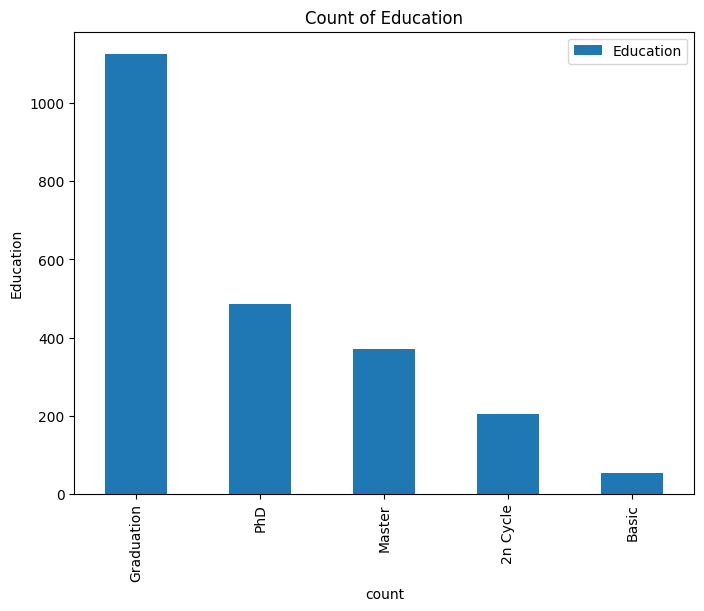

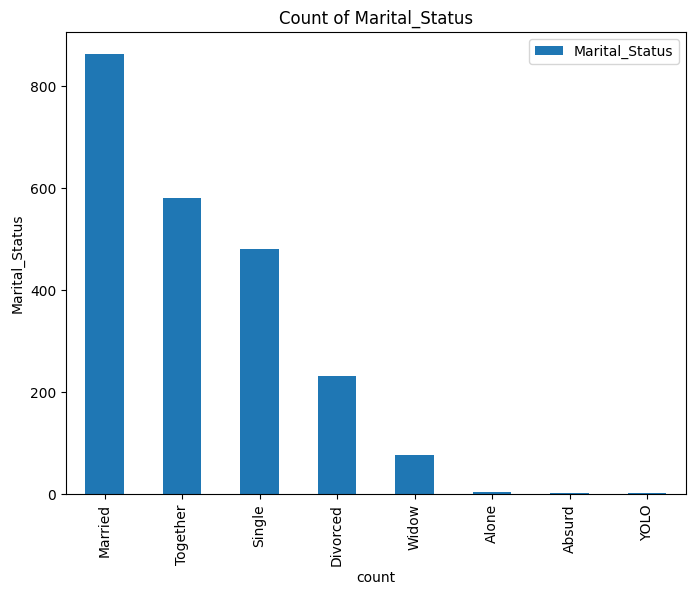

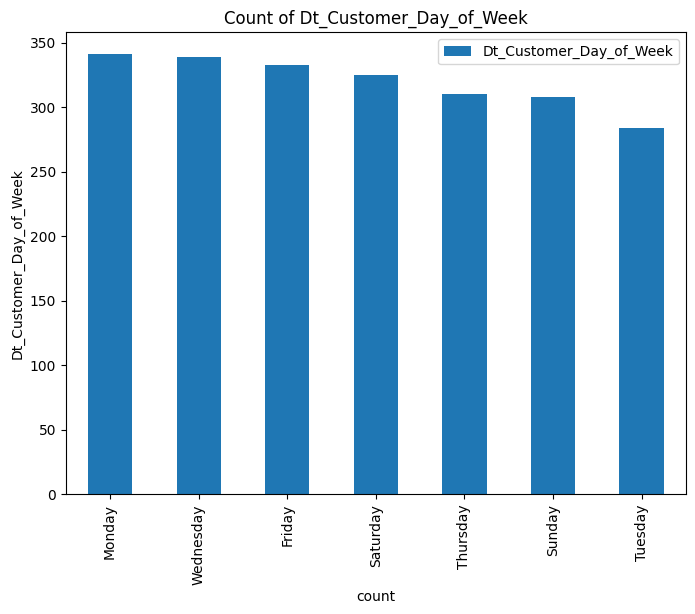

In [15]:
for i in [x for x in (list(df.select_dtypes(include='object').columns))]:
  pd.DataFrame(df[i].value_counts()).plot(kind='bar',ylabel = i,xlabel="count",title=f"Count of {i}",figsize=(8,6),legend=True)
 # plt.savefig(f"/content/drive/MyDrive/IIT-Roorkee Project/Univariate_Graphical_Analysis_Non_Numeric/Barplot_of_{i}.jpg",format='jpg')
  plt.show()

## **Multivariate Data Analysis**

### **Numeric,Non - Numeric Variable and Response**

In [16]:
for i in [x for x in (list(df.select_dtypes(exclude='object').columns)) if x not in ['Response','Dt_Customer']]:
  for j in [x for x in (list(df.select_dtypes(include='object').columns))]:
    sns.scatterplot(data = df,x=j,y=i,hue = 'Response')
    plt.xlabel(xlabel = j,fontsize = 8)
    plt.ylabel(ylabel = i,fontsize = 8)
    plt.title(label = f'Scatterplot between {j} V/s {i} with hue "Response"',fontsize = 15)
    plt.legend()
   # plt.savefig(f"/content/drive/MyDrive/IIT-Roorkee Project/Multivariate_Graphical_Analysis/scatterplot_between_{i}_{j}_Response.jpg",format='jpg')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **Response Distribution**

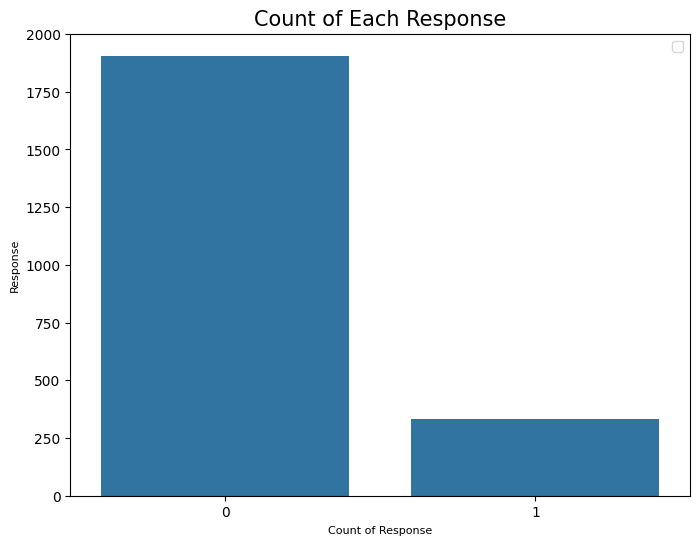

In [17]:
sns.countplot(data=df,x = df['Response'])
plt.xlabel("Count of Response",fontsize = 8)
plt.ylabel("Response",fontsize = 8)
plt.title("Count of Each Response",fontsize = 15)
plt.legend()
#plt.savefig(f"/content/drive/MyDrive/IIT-Roorkee Project/Response_Variable_Distribution.jpg",format='jpg')
plt.show()

# **Imputation of Missing Values**

### The income has missing value, we are imputing the missing values with mean.

In [18]:
df1 = pd.DataFrame()
for edu in df['Education'].unique():
    for msr in df['Marital_Status'].unique():
        df_temp=df[(df['Education']==edu)&(df['Marital_Status']==msr)]
        inc_mean=df_temp[~df_temp['Income'].isna()]['Income'].mean()
        df_temp.fillna(inc_mean,inplace=True)
        df1 = pd.concat([df_temp,df1])
df1

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_day,Dt_Customer_month,Dt_Customer_year,Dt_Customer_Day_of_Week,Dt_Customer_Current_Age
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3921,1952,2n Cycle,Widow,28457.0,0,0,2012-10-28,96,24,1,108,29,29,14,1,4,1,4,8,0,0,0,0,0,0,3,11,0,28,10,2012,Sunday,60
702,1975,2n Cycle,Widow,47682.0,0,1,2013-02-15,80,162,61,83,97,57,61,4,4,3,8,5,0,0,0,0,0,0,3,11,0,15,2,2013,Friday,38
2166,1960,2n Cycle,Widow,46779.0,1,1,2013-07-12,55,12,1,3,0,0,7,1,0,1,2,4,0,0,0,0,0,0,3,11,0,12,7,2013,Friday,53
7342,1961,2n Cycle,Widow,59184.0,0,1,2012-09-09,6,341,142,113,259,151,66,3,6,6,12,5,0,0,0,0,0,0,3,11,0,9,9,2012,Sunday,51
7313,1949,2n Cycle,Widow,74859.0,0,0,2013-06-03,63,570,73,614,133,102,73,1,6,5,11,3,0,0,0,1,0,0,3,11,0,3,6,2013,Monday,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10968,1969,Graduation,Single,57731.0,0,1,2012-11-23,0,266,21,300,65,8,44,4,8,8,6,6,0,0,0,0,0,0,3,11,0,23,11,2012,Friday,43
5959,1968,Graduation,Single,35893.0,1,1,2012-10-15,80,158,0,23,0,0,18,6,3,1,5,8,0,0,0,0,0,0,3,11,0,15,10,2012,Monday,44
4201,1962,Graduation,Single,57967.0,0,1,2013-03-03,39,229,7,137,4,0,91,5,4,2,8,5,0,0,0,0,0,0,3,11,0,3,3,2013,Sunday,51


# **One-Hot Encoding**


In [19]:
df1_numeric = df1.select_dtypes(exclude="object")
df1_numeric[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Dt_Customer_day', 'Dt_Customer_month',
       'Dt_Customer_year', 'Dt_Customer_Current_Age']] = MinMaxScaler().fit_transform(df1_numeric[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Dt_Customer_day', 'Dt_Customer_month',
       'Dt_Customer_year', 'Dt_Customer_Current_Age']])
df1_non_numeric=df1.select_dtypes(include="object")
df1_non_numeric['Marital_Status'] = df1_non_numeric['Marital_Status'].apply(lambda x: 'Single' if x == 'Alone' else ('Single' if x == 'Absurd' else ('Single' if x == 'YOLO' else x)))

In [20]:
df1_non_numeric_ms = pd.get_dummies(df1_non_numeric["Marital_Status"],prefix="Marital_Status")
df1_non_numeric_edu = pd.get_dummies(df1_non_numeric["Education"],prefix="Education")
df1_non_numeric_wkd = pd.get_dummies(df1_non_numeric["Dt_Customer_Day_of_Week"],prefix="Dt_Customer_Day_of_Week")
df1_concat = pd.concat([df1_numeric,df1_non_numeric_ms,df1_non_numeric_edu,df1_non_numeric_wkd],axis=1)
df1_concat

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_day,Dt_Customer_month,Dt_Customer_year,Dt_Customer_Current_Age,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Dt_Customer_Day_of_Week_Friday,Dt_Customer_Day_of_Week_Monday,Dt_Customer_Day_of_Week_Saturday,Dt_Customer_Day_of_Week_Sunday,Dt_Customer_Day_of_Week_Thursday,Dt_Customer_Day_of_Week_Tuesday,Dt_Customer_Day_of_Week_Wednesday
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3921,0.572816,0.040195,0.0,0.0,2012-10-28,0.969697,0.016075,0.005025,0.062609,0.111969,0.110266,0.038674,0.066667,0.148148,0.035714,0.307692,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.900000,0.818182,0.0,0.419048,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
702,0.796117,0.069107,0.0,0.5,2013-02-15,0.808081,0.108506,0.306533,0.048116,0.374517,0.216730,0.168508,0.266667,0.148148,0.107143,0.615385,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.466667,0.090909,0.5,0.209524,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
2166,0.650485,0.067749,0.5,0.5,2013-07-12,0.555556,0.008038,0.005025,0.001739,0.000000,0.000000,0.019337,0.066667,0.000000,0.035714,0.153846,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.366667,0.545455,0.5,0.352381,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
7342,0.660194,0.086405,0.0,0.5,2012-09-09,0.060606,0.228399,0.713568,0.065507,1.000000,0.574144,0.182320,0.200000,0.222222,0.214286,0.923077,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.266667,0.727273,0.0,0.333333,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
7313,0.543689,0.109979,0.0,0.0,2013-06-03,0.636364,0.381782,0.366834,0.355942,0.513514,0.387833,0.201657,0.066667,0.222222,0.178571,0.846154,0.15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.066667,0.454545,0.5,0.457143,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10968,0.737864,0.084220,0.0,0.5,2012-11-23,0.000000,0.178165,0.105528,0.173913,0.250965,0.030418,0.121547,0.266667,0.296296,0.285714,0.461538,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.733333,0.909091,0.0,0.257143,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
5959,0.728155,0.051378,0.5,0.5,2012-10-15,0.808081,0.105827,0.000000,0.013333,0.000000,0.000000,0.049724,0.400000,0.111111,0.035714,0.384615,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.466667,0.818182,0.0,0.266667,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4201,0.669903,0.084575,0.0,0.5,2013-03-03,0.393939,0.153382,0.035176,0.079420,0.015444,0.000000,0.251381,0.333333,0.148148,0.071429,0.615385,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.066667,0.181818,0.5,0.333333,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0


# **Final DataFrame for Model Creation**

In [21]:
df_final = df1_concat.loc[:,['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Dt_Customer_day', 'Dt_Customer_month',
       'Dt_Customer_year', 'Dt_Customer_Current_Age',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Dt_Customer_Day_of_Week_Friday', 'Dt_Customer_Day_of_Week_Monday',
       'Dt_Customer_Day_of_Week_Saturday', 'Dt_Customer_Day_of_Week_Sunday',
       'Dt_Customer_Day_of_Week_Thursday', 'Dt_Customer_Day_of_Week_Tuesday',
       'Dt_Customer_Day_of_Week_Wednesday', 'Response']]

# **1. Logistic Regression (Baseline Model)**

In [22]:
X = df_final.iloc[:,0:-1]
y = df_final.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Transactions in X_train dataset: ", X_train.shape)
print("Transaction classes in y_train dataset: ", y_train.shape)
print("Transactions in X_test dataset: ", X_test.shape)
print("Transaction classes in y_test dataset: ", y_test.shape)

Transactions in X_train dataset:  (1792, 45)
Transaction classes in y_train dataset:  (1792,)
Transactions in X_test dataset:  (448, 45)
Transaction classes in y_test dataset:  (448,)


In [23]:
LR = LogisticRegression().fit(X_train, y_train)
print(f"\nThe Coefficient of Independent Variables are below\n{pd.DataFrame(data = LR.coef_,columns=X.columns,index=['Coefficient']).T}")
print(f"\nThe Intercept is {LR.intercept_[0]}")
y_pred_class = LR.predict(X_test)


The Coefficient of Independent Variables are below
                                   Coefficient
Year_Birth                           -0.273747
Income                                0.189699
Kidhome                               0.495704
Teenhome                             -1.954078
Recency                              -2.650590
MntWines                             -0.001594
MntFruits                             0.434444
MntMeatProducts                       2.081943
MntFishProducts                       0.163816
MntSweetProducts                      0.234468
MntGoldProds                          0.622296
NumDealsPurchases                     0.959132
NumWebPurchases                       1.432592
NumCatalogPurchases                   1.199966
NumStorePurchases                    -1.840835
NumWebVisitsMonth                     1.169325
AcceptedCmp3                          1.880297
AcceptedCmp4                          1.036965
AcceptedCmp5                          1.535308
Accepted

### Confusion Matrix : It is a common way of presenting true positive (tp), true negative (tn), false positive (fp) and false negative (fn) predictions. Those values are presented in the form of a matrix where the Y-axis shows the true classes while the X-axis shows the predicted classes.
### False Positive Rate | Type I error : fraction of false alerts that will be raised based on your model predictions
### False Negative Rate | Type II error : fraction of missed fraudulent transactions that your model lets through
### True Negative Rate | Specificity : It measures how many observations out of all negative observations have we classified as negative
### False Discovery Rate : It measures how many predictions out of all positive predictions were incorrect
### True Positive Rate | Recall | Sensitivity : It measures how many observations out of all positive observations have we classified as positive
### Positive Predictive Value | Precision : It measures how many observations predicted as positive are in fact positive
### Accuracy : It measures how many observations, both positive and negative, were correctly classified
### F1 score (beta=1) :  It’s the harmonic mean between precision and recall
### Cohen Kappa Metric :  Cohen Kappa tells you how much better is your model over the random classifier that predicts based on class frequencies
### ROC Curve : It is a chart that visualizes the tradeoff between true positive rate (TPR) and false positive rate (FPR). Basically, for every threshold, we calculate TPR and FPR and plot it on one chart
### ROC AUC score : number that tells us how good our curve is, we can calculate the Area Under the ROC Curve, or ROC AUC score
### Precision-Recall Curve : It is a curve that combines precision (PPV) and Recall (TPR) in a single visualization. For every threshold, you calculate PPV and TPR and plot it. The higher on y-axis your curve is the better your model performance
### Log loss : Log loss is often used as the objective function that is optimized under the hood of machine learning models. Yet, it can also be used as a performance metric.

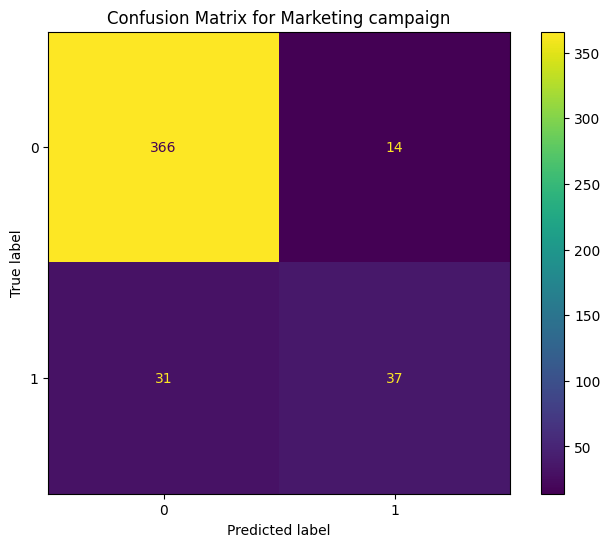


True Negative = 366
False Positive = 14
False Negative = 31
True Positive = 37
False Positive Rate = 3.68%
False Negative Rate = 45.59%
True Negative Rate = 96.32%
False Discovery Rate = 27.45%
Recall = 54.41%
Precision = 72.55%
Accuracy = 89.96%
F1 = 62.18%
cohen_kappa = 56.53%
Log-Loss = 3.6204562556032855


<Axes: title={'center': 'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

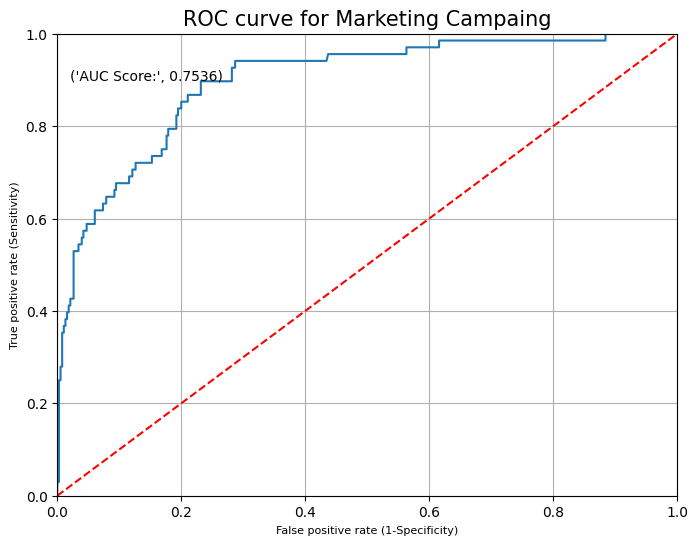

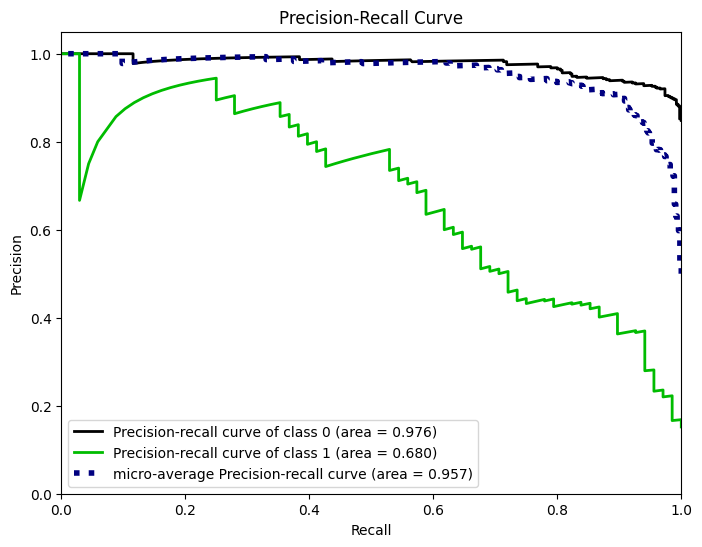

In [24]:
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=LR.classes_)
disp.plot()
plt.title("Confusion Matrix for Marketing campaign")
plt.show()
tn, fp, fn, tp = cm.ravel()
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (tp + fn)
true_negative_rate = tn / (tn + fp)
false_discovery_rate = fp/ (tp + fp)
recall = recall_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
cohen_kappa = cohen_kappa_score(y_test, y_pred_class)
loss = log_loss(y_test, y_pred_class)
print(f"\nTrue Negative = {tn}\nFalse Positive = {fp}\nFalse Negative = {fn}\nTrue Positive = {tp}\nFalse Positive Rate = {false_positive_rate*100:0.2f}%\nFalse Negative Rate = {false_negative_rate*100:0.2f}%\nTrue Negative Rate = {true_negative_rate*100:0.2f}%")
print(f"False Discovery Rate = {false_discovery_rate*100:0.2f}%\nRecall = {recall*100:0.2f}%\nPrecision = {precision*100:0.2f}%\nAccuracy = {accuracy*100:0.2f}%\nF1 = {f1*100:0.2f}%\ncohen_kappa = {cohen_kappa*100:0.2f}%\nLog-Loss = {loss}")
fpr, tpr, thresholds = roc_curve(y_test, LR.decision_function(X_test))
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Marketing Campaing', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 8)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 8)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_class),4)))
plt.grid(True)
plot_precision_recall(y_test, LR.predict_proba(X_test))

# **Imbalance DataSet**
### Balancing the Imbalanced DataSet by OverSampling Using SMOTE

In [25]:
X = df_final.iloc[:,0:-1]
y = df_final.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Before over-sampling:\n", y_train.value_counts())
X_train_res, y_train_res = SMOTE().fit_resample(X_train, y_train)
print("After over-sampling:\n", y_train_res.value_counts())

Before over-sampling:
 0    1526
1     266
Name: Response, dtype: int64
After over-sampling:
 0    1526
1    1526
Name: Response, dtype: int64


# **2. Decision Tree**

In [26]:
print("Transactions in X_train dataset: ", X_train_res.shape)
print("Transaction classes in y_train dataset: ", y_train_res.shape)
print("Transactions in X_test dataset: ", X_test.shape)
print("Transaction classes in y_test dataset: ", y_test.shape)

Transactions in X_train dataset:  (3052, 45)
Transaction classes in y_train dataset:  (3052,)
Transactions in X_test dataset:  (448, 45)
Transaction classes in y_test dataset:  (448,)


In [27]:
tuned_paramaters = [{'criterion': ['entropy', 'gini', 'log_loss'],
                     'splitter':['best','random'],
                     'max_depth': range(2, 10),
                     'min_samples_split': range(2,10)
                     }]
tree_grid = GridSearchCV(estimator = DecisionTreeClassifier(random_state = 10),
                         param_grid = tuned_paramaters,
                         cv = 5)
tree_grid.fit(X_train_res, y_train_res)
print('Best parameters for Decision Tree Classifier: ', tree_grid.best_params_, '\n')
decision_tree_tuned_model = DecisionTreeClassifier(criterion = tree_grid.best_params_['criterion'],
                                                   max_depth = tree_grid.best_params_['max_depth'],
                                                   min_samples_split = tree_grid.best_params_['min_samples_split'],
                                                   splitter = tree_grid.best_params_['splitter'])

scores = cross_val_score(estimator = decision_tree_tuned_model,
                         X = X_train_res,
                         y = y_train_res,
                         cv = 10,
                         scoring = 'roc_auc')
print("Mean ROC-AUC score after 10 fold cross validation: ", round(scores.mean(), 2))

Best parameters for Decision Tree Classifier:  {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 3, 'splitter': 'best'} 

Mean ROC-AUC score after 10 fold cross validation:  0.92


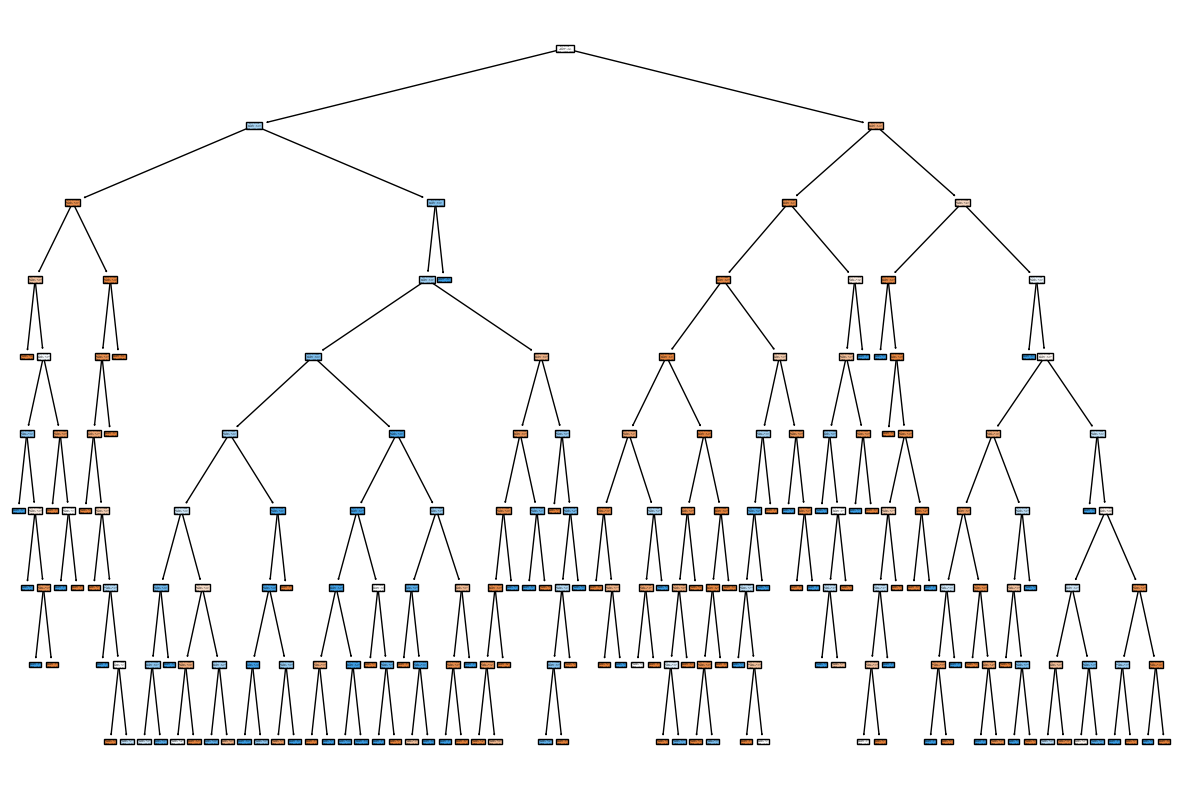

In [28]:
DT = decision_tree_tuned_model.fit(X_train_res, y_train_res)
plt.figure(figsize=(15,10))
plot_tree(DT,filled=True)
plt.show()
y_pred_class = DT.predict(X_test)

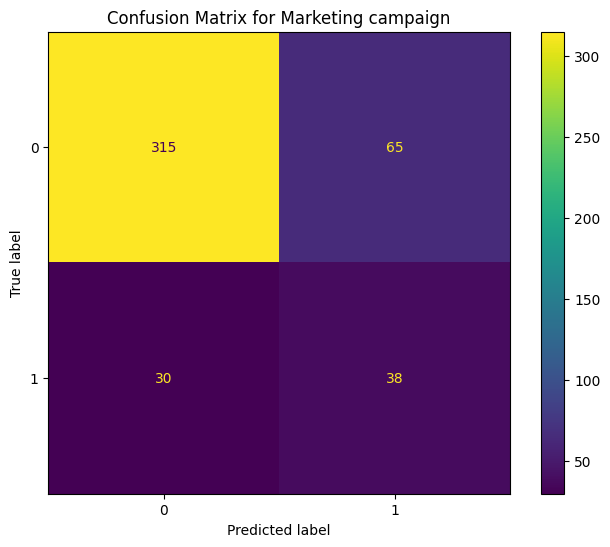


True Negative = 315
False Positive = 65
False Negative = 30
True Positive = 38
False Positive Rate = 17.11%
False Negative Rate = 44.12%
True Negative Rate = 82.89%
False Discovery Rate = 63.11%
Recall = 55.88%
Precision = 36.89%
Accuracy = 78.79%
F1 = 44.44%
cohen_kappa = 32.01%
Log-Loss = 7.6431854284958245


<Axes: title={'center': 'Feature Importance'}, xlabel='Score', ylabel='Features'>

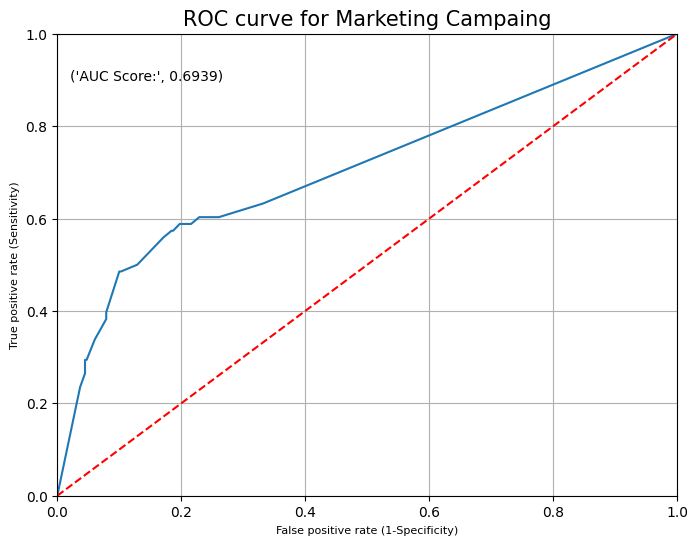

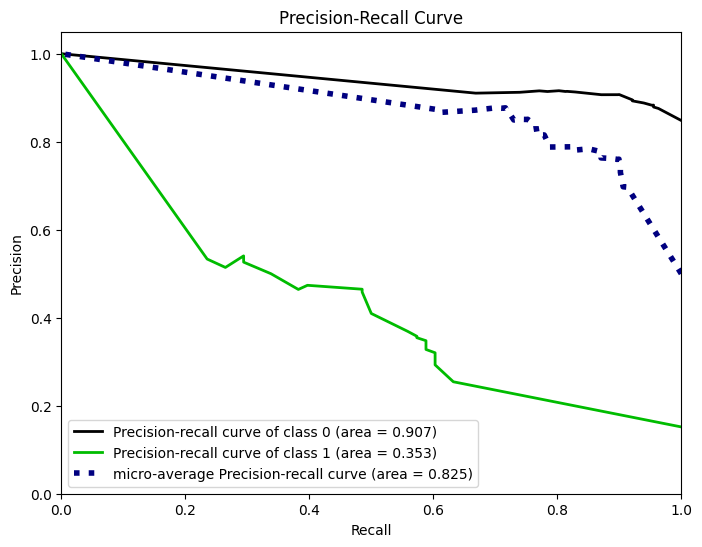

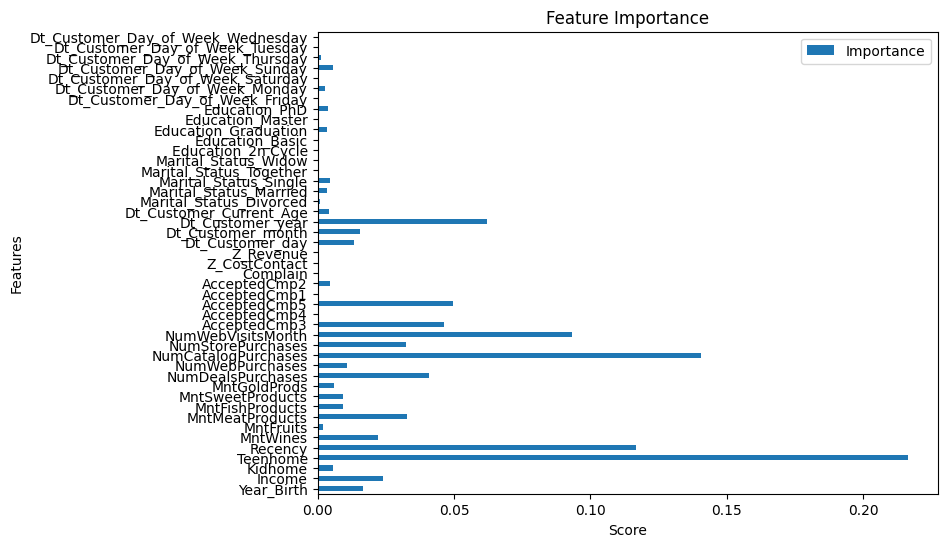

In [29]:
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=DT.classes_)
disp.plot()
plt.title("Confusion Matrix for Marketing campaign")
plt.show()
tn, fp, fn, tp = cm.ravel()
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (tp + fn)
true_negative_rate = tn / (tn + fp)
false_discovery_rate = fp/ (tp + fp)
recall = recall_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
cohen_kappa = cohen_kappa_score(y_test, y_pred_class)
loss = log_loss(y_test, y_pred_class)
print(f"\nTrue Negative = {tn}\nFalse Positive = {fp}\nFalse Negative = {fn}\nTrue Positive = {tp}\nFalse Positive Rate = {false_positive_rate*100:0.2f}%\nFalse Negative Rate = {false_negative_rate*100:0.2f}%\nTrue Negative Rate = {true_negative_rate*100:0.2f}%")
print(f"False Discovery Rate = {false_discovery_rate*100:0.2f}%\nRecall = {recall*100:0.2f}%\nPrecision = {precision*100:0.2f}%\nAccuracy = {accuracy*100:0.2f}%\nF1 = {f1*100:0.2f}%\ncohen_kappa = {cohen_kappa*100:0.2f}%\nLog-Loss = {loss}")
fpr, tpr, thresholds = roc_curve(y_test, DT.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Marketing Campaing', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 8)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 8)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_class),4)))
plt.grid(True)
plot_precision_recall(y_test, DT.predict_proba(X_test))
pd.DataFrame(DT.feature_importances_,index=X_test.columns,columns=['Importance']).plot(kind='barh',ylabel = "Features",xlabel= "Score",title="Feature Importance",figsize=(8,6),legend=True)

# **3. Random Forest**

In [30]:
print("Transactions in X_train dataset: ", X_train_res.shape)
print("Transaction classes in y_train dataset: ", y_train_res.shape)
print("Transactions in X_test dataset: ", X_test.shape)
print("Transaction classes in y_test dataset: ", y_test.shape)

Transactions in X_train dataset:  (3052, 45)
Transaction classes in y_train dataset:  (3052,)
Transactions in X_test dataset:  (448, 45)
Transaction classes in y_test dataset:  (448,)


In [31]:
tuned_paramaters = [{'criterion': ['entropy', 'gini', 'log_loss'],
                     'n_estimators' : [90, 100, 150, 200],
                     'max_depth' : [10, 15, 20],
                     'min_samples_split' : [2, 5, 8]
                     }]
forest_grid = GridSearchCV(estimator = RandomForestClassifier(random_state = 10),
                         param_grid = tuned_paramaters,
                         cv = 5)
forest_grid.fit(X_train_res, y_train_res)
print('Best parameters for Random Forest Classifier: ', forest_grid.best_params_, '\n')
random_forest_tuned_model = RandomForestClassifier(criterion = forest_grid.best_params_['criterion'],
                                                   n_estimators = forest_grid.best_params_['n_estimators'],
                                                   max_depth = forest_grid.best_params_['max_depth'],
                                                   min_samples_split = forest_grid.best_params_['min_samples_split'])

scores = cross_val_score(estimator = random_forest_tuned_model,
                         X = X_train_res,
                         y = y_train_res,
                         cv = 10,
                         scoring = 'roc_auc')
print("Mean ROC-AUC score after 10 fold cross validation: ", round(scores.mean(), 2))

Best parameters for Random Forest Classifier:  {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200} 

Mean ROC-AUC score after 10 fold cross validation:  0.99


In [32]:
RF = random_forest_tuned_model.fit(X_train_res, y_train_res)
y_pred_class = RF.predict(X_test)

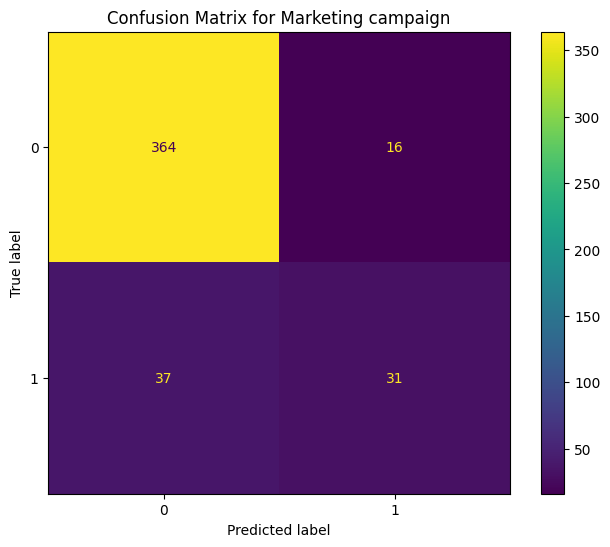


True Negative = 364
False Positive = 16
False Negative = 37
True Positive = 31
False Positive Rate = 4.21%
False Negative Rate = 54.41%
True Negative Rate = 95.79%
False Discovery Rate = 34.04%
Recall = 45.59%
Precision = 65.96%
Accuracy = 88.17%
F1 = 53.91%
cohen_kappa = 47.39%
Log-Loss = 4.264092923266092


<Axes: title={'center': 'Feature Importance'}, xlabel='Score', ylabel='Features'>

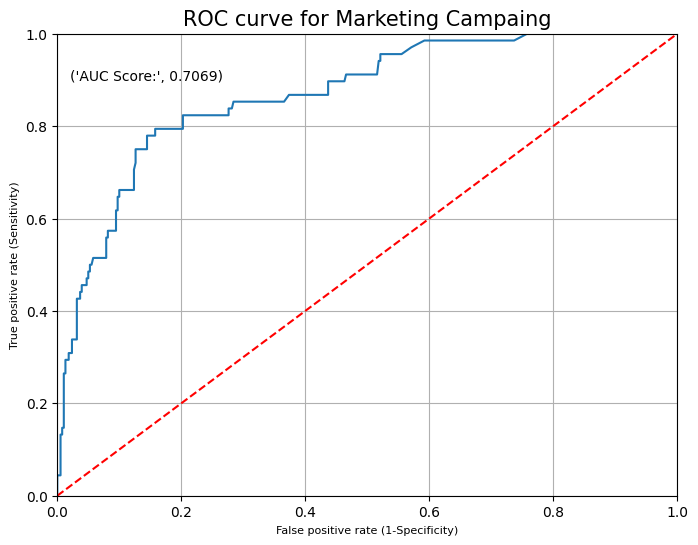

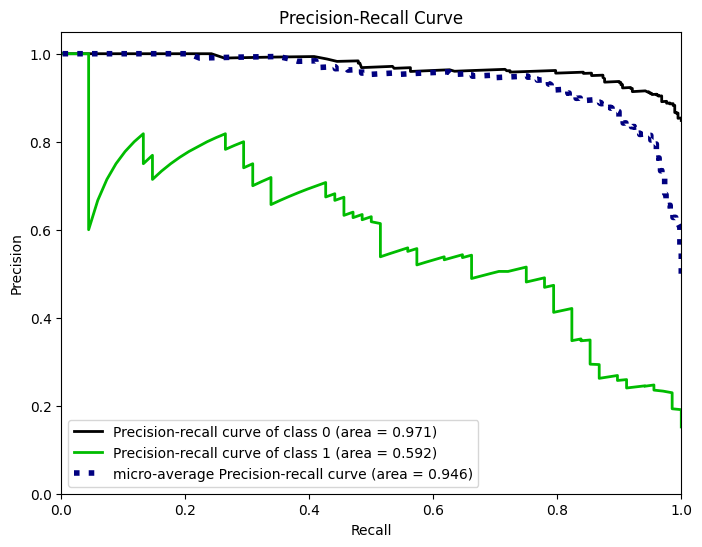

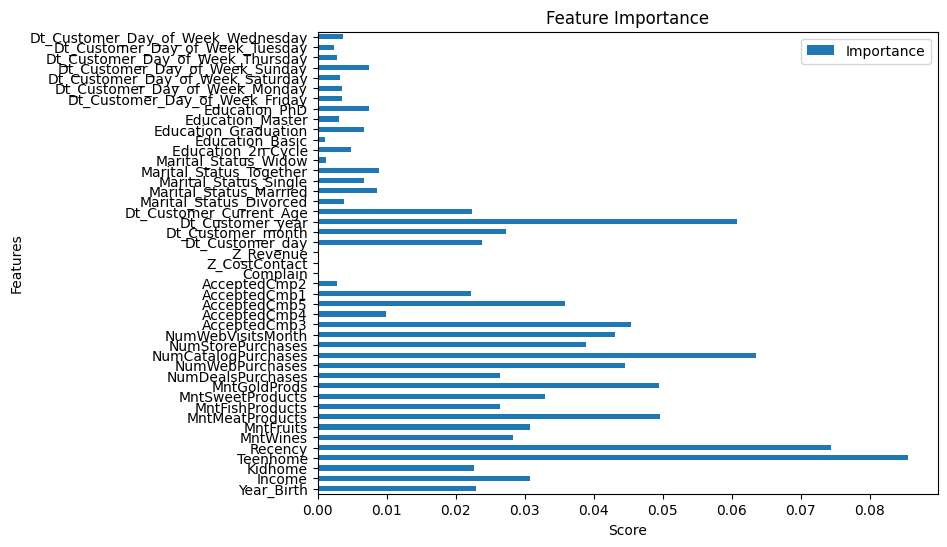

In [33]:
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RF.classes_)
disp.plot()
plt.title("Confusion Matrix for Marketing campaign")
plt.show()
tn, fp, fn, tp = cm.ravel()
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (tp + fn)
true_negative_rate = tn / (tn + fp)
false_discovery_rate = fp/ (tp + fp)
recall = recall_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
cohen_kappa = cohen_kappa_score(y_test, y_pred_class)
loss = log_loss(y_test, y_pred_class)
print(f"\nTrue Negative = {tn}\nFalse Positive = {fp}\nFalse Negative = {fn}\nTrue Positive = {tp}\nFalse Positive Rate = {false_positive_rate*100:0.2f}%\nFalse Negative Rate = {false_negative_rate*100:0.2f}%\nTrue Negative Rate = {true_negative_rate*100:0.2f}%")
print(f"False Discovery Rate = {false_discovery_rate*100:0.2f}%\nRecall = {recall*100:0.2f}%\nPrecision = {precision*100:0.2f}%\nAccuracy = {accuracy*100:0.2f}%\nF1 = {f1*100:0.2f}%\ncohen_kappa = {cohen_kappa*100:0.2f}%\nLog-Loss = {loss}")
fpr, tpr, thresholds = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Marketing Campaing', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 8)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 8)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_class),4)))
plt.grid(True)
plot_precision_recall(y_test, RF.predict_proba(X_test))
pd.DataFrame(RF.feature_importances_,index=X_test.columns,columns=['Importance']).plot(kind='barh',ylabel = "Features",xlabel= "Score",title="Feature Importance",figsize=(8,6),legend=True)

# **Ada Boost**

In [34]:
print("Transactions in X_train dataset: ", X_train_res.shape)
print("Transaction classes in y_train dataset: ", y_train_res.shape)
print("Transactions in X_test dataset: ", X_test.shape)
print("Transaction classes in y_test dataset: ", y_test.shape)

Transactions in X_train dataset:  (3052, 45)
Transaction classes in y_train dataset:  (3052,)
Transactions in X_test dataset:  (448, 45)
Transaction classes in y_test dataset:  (448,)


In [35]:
tuned_paramaters = [{'n_estimators' : [90, 100, 150, 200],
                     'learning_rate' : [0.001,0.0001,0.1,1]
                     }]
adaboost_grid = GridSearchCV(estimator = AdaBoostClassifier(random_state = 10),
                         param_grid = tuned_paramaters,
                         cv = 5)
adaboost_grid.fit(X_train_res, y_train_res)
print('Best parameters for Ada Boost Classifier: ', adaboost_grid.best_params_, '\n')
ada_boost_classifier_tuned_model = AdaBoostClassifier(n_estimators = adaboost_grid.best_params_['n_estimators'],
                                                      learning_rate=adaboost_grid.best_params_['learning_rate'])

scores = cross_val_score(estimator = ada_boost_classifier_tuned_model,
                         X = X_train_res,
                         y = y_train_res,
                         cv = 10,
                         scoring = 'roc_auc')
print("Mean ROC-AUC score after 10 fold cross validation: ", round(scores.mean(), 2))

Best parameters for Ada Boost Classifier:  {'learning_rate': 1, 'n_estimators': 200} 

Mean ROC-AUC score after 10 fold cross validation:  0.97


In [36]:
ADB = ada_boost_classifier_tuned_model.fit(X_train_res, y_train_res)
y_pred_class = ADB.predict(X_test)

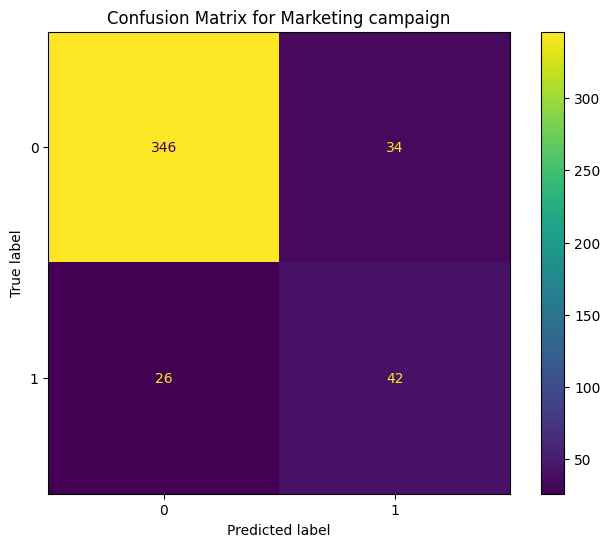


True Negative = 346
False Positive = 34
False Negative = 26
True Positive = 42
False Positive Rate = 8.95%
False Negative Rate = 38.24%
True Negative Rate = 91.05%
False Discovery Rate = 44.74%
Recall = 61.76%
Precision = 55.26%
Accuracy = 86.61%
F1 = 58.33%
cohen_kappa = 50.38%
Log-Loss = 4.827275007471047


<Axes: title={'center': 'Feature Importance'}, xlabel='Score', ylabel='Features'>

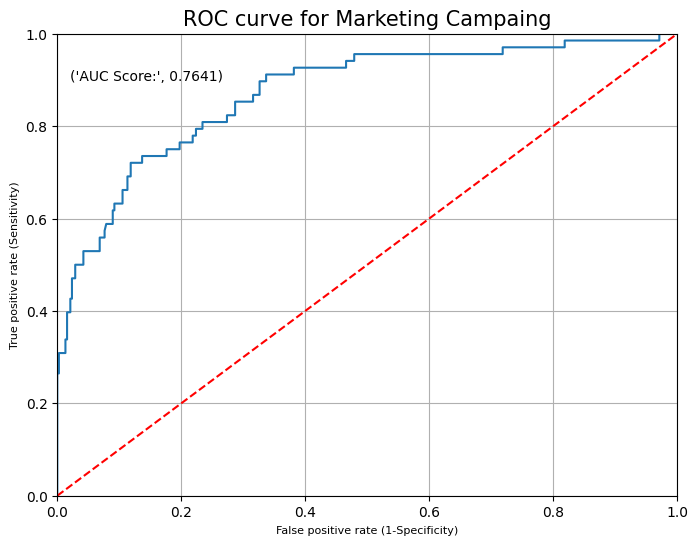

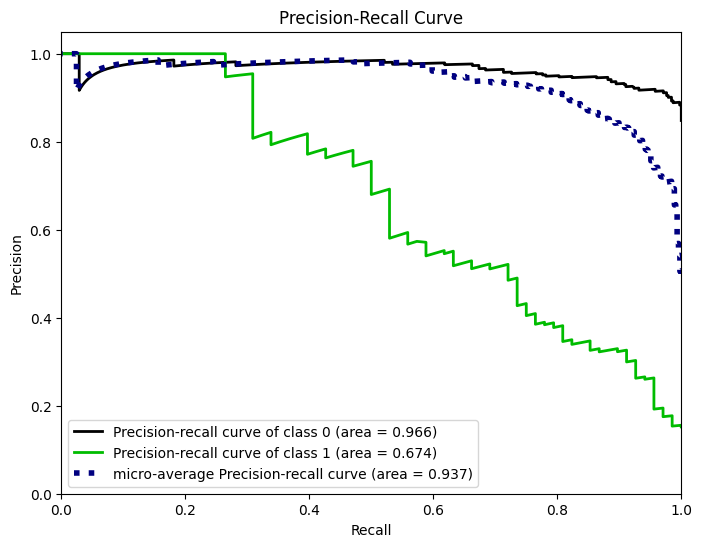

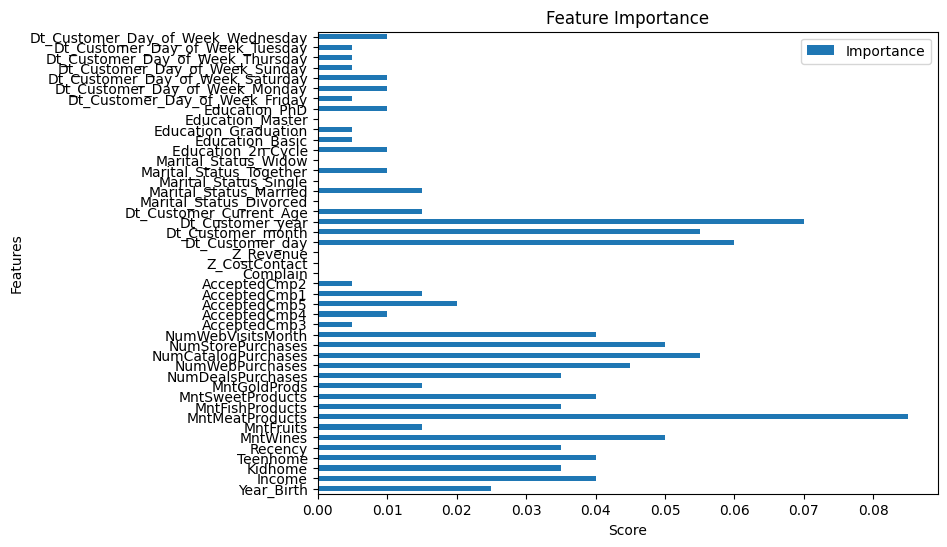

In [37]:
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ADB.classes_)
disp.plot()
plt.title("Confusion Matrix for Marketing campaign")
plt.show()
tn, fp, fn, tp = cm.ravel()
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (tp + fn)
true_negative_rate = tn / (tn + fp)
false_discovery_rate = fp/ (tp + fp)
recall = recall_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
cohen_kappa = cohen_kappa_score(y_test, y_pred_class)
loss = log_loss(y_test, y_pred_class)
print(f"\nTrue Negative = {tn}\nFalse Positive = {fp}\nFalse Negative = {fn}\nTrue Positive = {tp}\nFalse Positive Rate = {false_positive_rate*100:0.2f}%\nFalse Negative Rate = {false_negative_rate*100:0.2f}%\nTrue Negative Rate = {true_negative_rate*100:0.2f}%")
print(f"False Discovery Rate = {false_discovery_rate*100:0.2f}%\nRecall = {recall*100:0.2f}%\nPrecision = {precision*100:0.2f}%\nAccuracy = {accuracy*100:0.2f}%\nF1 = {f1*100:0.2f}%\ncohen_kappa = {cohen_kappa*100:0.2f}%\nLog-Loss = {loss}")
fpr, tpr, thresholds = roc_curve(y_test, ADB.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Marketing Campaing', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 8)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 8)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_class),4)))
plt.grid(True)
plot_precision_recall(y_test, ADB.predict_proba(X_test))
pd.DataFrame(ADB.feature_importances_,index=X_test.columns,columns=['Importance']).plot(kind='barh',ylabel = "Features",xlabel= "Score",title="Feature Importance",figsize=(8,6),legend=True)

# **XG Boost**

In [38]:

tuned_paramaters = [{'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9],
              'n_estimators': [50,65,80,100]}]
XGB_grid = GridSearchCV(estimator = XGBClassifier(random_state = 10),
                         param_grid = tuned_paramaters,
                         cv = 5)
XGB_grid.fit(X_train_res, y_train_res)
print('Best parameters for XGBoost Classifier: ', XGB_grid.best_params_, '\n')
XG_boost_classifier_tuned_model = XGBClassifier(learning_rate=XGB_grid.best_params_['learning_rate'],
                                                       max_depth=XGB_grid.best_params_['max_depth'],
                                                       n_estimators=XGB_grid.best_params_['n_estimators'])

scores = cross_val_score(estimator = XG_boost_classifier_tuned_model,
                         X = X_train_res,
                         y = y_train_res,
                         cv = 10,
                         scoring = 'roc_auc')
print("Mean ROC-AUC score after 10 fold cross validation: ", round(scores.mean(), 2))

Best parameters for XGBoost Classifier:  {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100} 

Mean ROC-AUC score after 10 fold cross validation:  0.99


In [39]:
XGB = XG_boost_classifier_tuned_model.fit(X_train_res, y_train_res)
y_pred_class = XGB.predict(X_test)

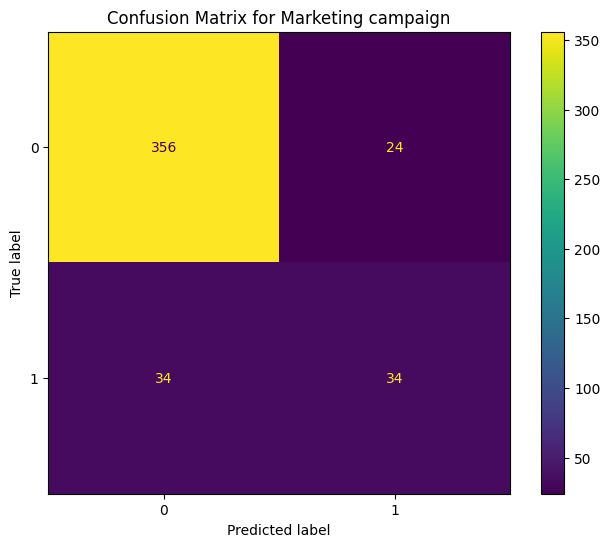


True Negative = 356
False Positive = 24
False Negative = 34
True Positive = 34
False Positive Rate = 6.32%
False Negative Rate = 50.00%
True Negative Rate = 93.68%
False Discovery Rate = 41.38%
Recall = 50.00%
Precision = 58.62%
Accuracy = 87.05%
F1 = 53.97%
cohen_kappa = 46.49%
Log-Loss = 4.666365840555345


<Axes: title={'center': 'Feature Importance'}, xlabel='Score', ylabel='Features'>

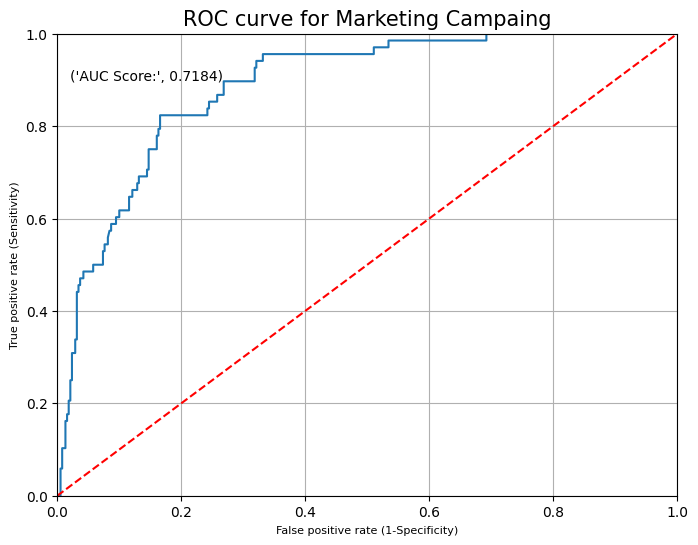

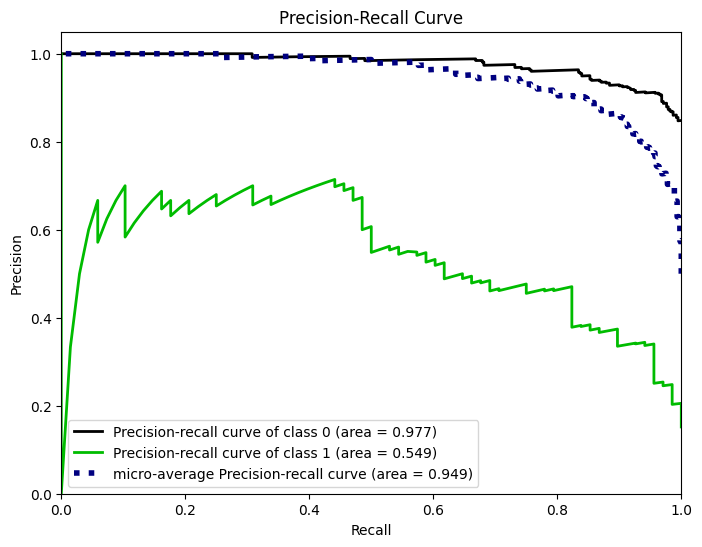

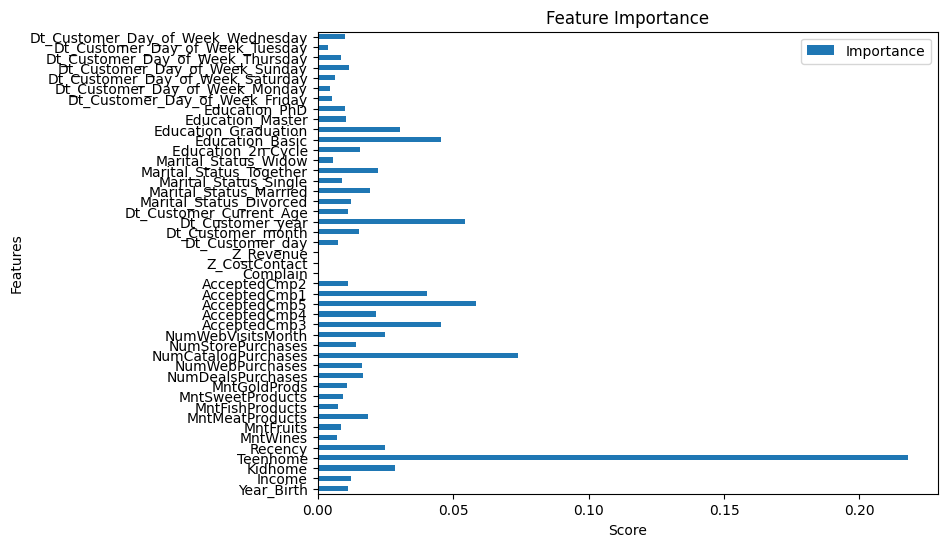

In [40]:
cm = confusion_matrix(y_test, y_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=XGB.classes_)
disp.plot()
plt.title("Confusion Matrix for Marketing campaign")
plt.show()
tn, fp, fn, tp = cm.ravel()
false_positive_rate = fp / (fp + tn)
false_negative_rate = fn / (tp + fn)
true_negative_rate = tn / (tn + fp)
false_discovery_rate = fp/ (tp + fp)
recall = recall_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)
cohen_kappa = cohen_kappa_score(y_test, y_pred_class)
loss = log_loss(y_test, y_pred_class)
print(f"\nTrue Negative = {tn}\nFalse Positive = {fp}\nFalse Negative = {fn}\nTrue Positive = {tp}\nFalse Positive Rate = {false_positive_rate*100:0.2f}%\nFalse Negative Rate = {false_negative_rate*100:0.2f}%\nTrue Negative Rate = {true_negative_rate*100:0.2f}%")
print(f"False Discovery Rate = {false_discovery_rate*100:0.2f}%\nRecall = {recall*100:0.2f}%\nPrecision = {precision*100:0.2f}%\nAccuracy = {accuracy*100:0.2f}%\nF1 = {f1*100:0.2f}%\ncohen_kappa = {cohen_kappa*100:0.2f}%\nLog-Loss = {loss}")
fpr, tpr, thresholds = roc_curve(y_test, XGB.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Marketing Campaing', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 8)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 8)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_class),4)))
plt.grid(True)
plot_precision_recall(y_test, XGB.predict_proba(X_test))
pd.DataFrame(XGB.feature_importances_,index=X_test.columns,columns=['Importance']).plot(kind='barh',ylabel = "Features",xlabel= "Score",title="Feature Importance",figsize=(8,6),legend=True)